# Job Recommendation System
You are required to build a system to recommend the job functions in which an employee with a specific job title can work.

Basically, given the job title, recommend a job function (and an industry)

### 1. Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

### 2. Read data

In [4]:
df = pd.read_csv('jobs_data.csv')
df.head()

,Unnamed: 0,title,jobFunction,industry
0,0,Full Stack PHP Developer,"['Engineering - Telecom/Technology', 'IT/Softw...","['Computer Software', 'Marketing and Advertisi..."
1,1,CISCO Collaboration Specialist Engineer,"['Installation/Maintenance/Repair', 'IT/Softwa...",['Information Technology Services']
2,2,Senior Back End-PHP Developer,"['Engineering - Telecom/Technology', 'IT/Softw...","['Computer Software', 'Computer Networking']"
3,3,UX Designer,"['Creative/Design/Art', 'IT/Software Developme...","['Computer Software', 'Information Technology ..."
4,4,Java Technical Lead,"['Engineering - Telecom/Technology', 'IT/Softw...","['Computer Software', 'Information Technology ..."


### 3. Pre-processing 

In [34]:
import ast
vals_jf = []

for val in df["jobFunction"]:
    x = ast.literal_eval(val)
    vals_jf.append(x)

# Convert the vals array into a dataframe
jf_df = pd.DataFrame(data=vals_jf)
jf_df.columns = ['jf_1', 'jf_2', 'jf_3']

# Drop the 'jobFunction' column
df_no_jf = df.drop(columns='jobFunction') 

# concatinate the two DFs
df_new = pd.concat([df_no_jf, jf_df], axis=1)
df_new = df_new.drop_duplicates()
df_new.sort_values(by='title').head()

,Unnamed: 0,title,industry,jf_1,jf_2,jf_3
9149,9149,.NET Backend Developer,['Information Technology Services'],Engineering - Telecom/Technology,IT/Software Development,None
1045,1045,.NET Backend Developer,['Information Technology Services'],Engineering - Telecom/Technology,IT/Software Development,None
9413,9413,.NET Backend Developer,['Information Technology Services'],IT/Software Development,Engineering - Telecom/Technology,None
3694,3694,.NET Core Developer - Senior\Team Lead,['Information Technology Services'],IT/Software Development,Engineering - Telecom/Technology,None
5263,5263,.NET Developer,"['Computer Software', 'Internet/E-commerce', '...",Engineering - Telecom/Technology,IT/Software Development,None


In [6]:
vals_ind = []

for val in df["industry"]:
    x = ast.literal_eval(val)
    vals_ind.append(x)

ind_df = pd.DataFrame(data=vals_ind)
ind_df.columns = ['ind_1', 'ind_2', 'ind_3']

df_no_ind = df_new.drop(columns='industry') 

df_final = pd.concat([df_no_ind, ind_df], axis=1)

In [35]:
df_final_drop = df_final.drop_duplicates()
df2 = df_final_drop.fillna('')
df2.head()

,Unnamed: 0,title,jf_1,jf_2,jf_3,ind_1,ind_2,ind_3
0,0,Full Stack PHP Developer,Engineering - Telecom/Technology,IT/Software Development,,Computer Software,Marketing and Advertising,
1,1,CISCO Collaboration Specialist Engineer,Installation/Maintenance/Repair,IT/Software Development,Engineering - Telecom/Technology,Information Technology Services,,
2,2,Senior Back End-PHP Developer,Engineering - Telecom/Technology,IT/Software Development,,Computer Software,Computer Networking,
3,3,UX Designer,Creative/Design/Art,IT/Software Development,,Computer Software,Information Technology Services,Computer Games
4,4,Java Technical Lead,Engineering - Telecom/Technology,IT/Software Development,,Computer Software,Information Technology Services,


In [8]:
job_title = "Data Scientist"
result = df2.loc[df2['title'] == job_title, :]
result = result.drop_duplicates()
result

,Unnamed: 0,title,jf_1,jf_2,jf_3,ind_1,ind_2,ind_3
866,866,Data Scientist,Analyst/Research,Engineering - Telecom/Technology,,Computer Software,FMCG,
4197,4197,Data Scientist,Analyst/Research,Engineering - Telecom/Technology,,Computer Software,FMCG,
4500,4500,Data Scientist,IT/Software Development,Analyst/Research,,Computer Software,,
8551,8551,Data Scientist,Analyst/Research,Engineering - Telecom/Technology,,Computer Software,FMCG,


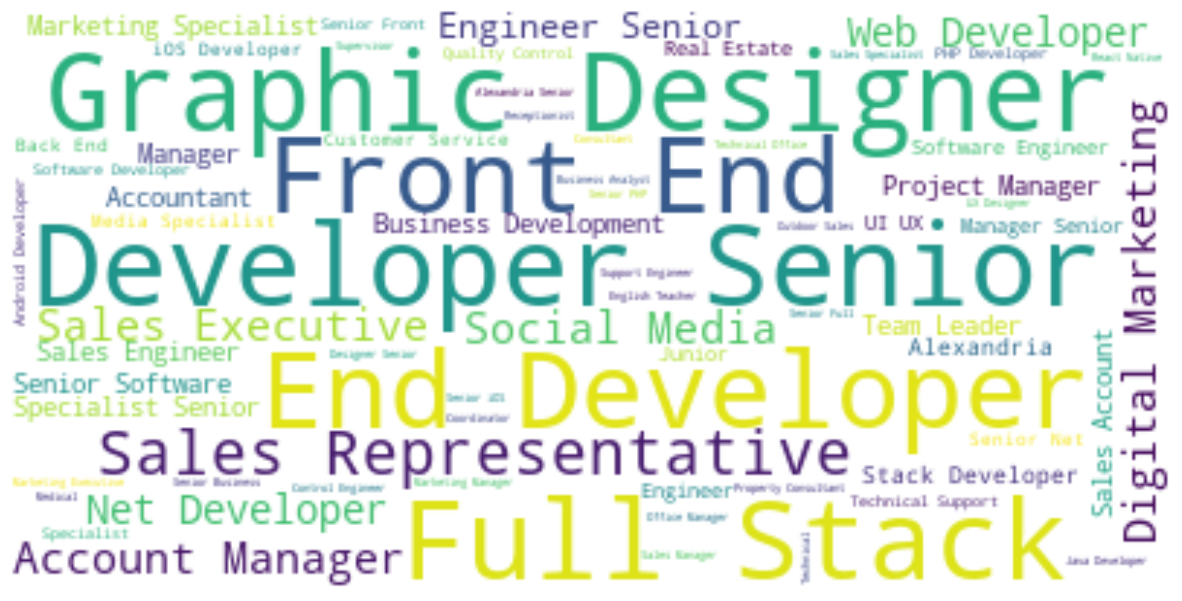

In [9]:
text = " ".join(i for i in df["title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Recommendation System

#### 4.1. Given job title, recommend function

#### Ideas:
   - Combine the 'title', 'ind_1', 'ind_2' and 'ind_3' to one column as a word bag
   - Drop the 'jf_2' and 'jf_3' columns
   - Train the TFIDF on the new column
   - Use it to predict the top 5 jf_1's

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
df2['title'] = df2['title'].fillna('')
tfidf_matrix_title = tfidf.fit_transform(df2['title'])
tfidf_matrix_title.shape

(10870, 1320)

In [41]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix_title, tfidf_matrix_title)

In [42]:
df2 = df2.reset_index()
df2

,index,Unnamed: 0,title,jf_1,jf_2,jf_3,ind_1,ind_2,ind_3
0,0,0,Full Stack PHP Developer,Engineering - Telecom/Technology,IT/Software Development,,Computer Software,Marketing and Advertising,
1,1,1,CISCO Collaboration Specialist Engineer,Installation/Maintenance/Repair,IT/Software Development,Engineering - Telecom/Technology,Information Technology Services,,
2,2,2,Senior Back End-PHP Developer,Engineering - Telecom/Technology,IT/Software Development,,Computer Software,Computer Networking,
3,3,3,UX Designer,Creative/Design/Art,IT/Software Development,,Computer Software,Information Technology Services,Computer Games
4,4,4,Java Technical Lead,Engineering - Telecom/Technology,IT/Software Development,,Computer Software,Information Technology Services,
...,...,...,...,...,...,...,...,...,...
10865,10865,10865,Odoo Developer,IT/Software Development,Engineering - Telecom/Technology,,Real Estate/Property Management,Manufacturing,
10866,10866,10866,Senior PHP Developer - Alexandria,Engineering - Telecom/Technology,IT/Software Development,,Information Technology Services,,
10867,10867,10867,Sales & Account Manager (Real Estate / Medical...,Business Development,Sales/Retail,Customer Service/Support,Real Estate/Property Management,Retail,Healthcare and Medical Services
10868,10868,10868,Technical and Network Support Engineer - Alexa...,Installation/Maintenance/Repair,Engineering - Telecom/Technology,IT/Software Development,Computer Software,Education,Healthcare and Medical Services


In [13]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [14]:
indices

title
Full Stack PHP Developer                                        0
CISCO Collaboration Specialist Engineer                         1
Senior Back End-PHP Developer                                   2
UX Designer                                                     3
Java Technical Lead                                             4
                                                            ...  
Odoo Developer                                              10865
Senior PHP Developer - Alexandria                           10866
Sales & Account Manager (Real Estate / Medical) - Assiut    10867
Technical and Network Support Engineer - Alexandria         10868
Senior Java Developer                                       10869
Length: 10870, dtype: int64

#### We are now in a good position to define our recommendation function. These are the following steps we'll follow :-

- Get the index of the title.
- Get the list of cosine similarity scores. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
- Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
- Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
- Return the titles corresponding to the indices of the top elements.

In [44]:
# Function that takes in title of jobs as input and outputs most similar jobs
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all jobs with that job
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the jobs based on the similarity scores
    sim_scores = sorted(sim_scores, reverse=True)

    # Get the scores of the 10 most similar jobs
    sim_scores = sim_scores[1:11]

    # Get the job indices
    job_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['jf_1'].iloc[job_indices]

In [45]:
get_recommendations('UX Designer')

4    Engineering - Telecom/Technology
3                 Creative/Design/Art
2    Engineering - Telecom/Technology
1     Installation/Maintenance/Repair
0    Engineering - Telecom/Technology
Name: jf_1, dtype: object

#### 4.2. Given job title, recommend job function and industry

In [18]:
# Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf2 = TfidfVectorizer(stop_words='english')

# Re-read the dropped dataframe
df3 = df_final_drop.fillna('')

# Replace NaN with an empty string
df3['title'] = df3['title'].fillna('')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_title2 = tfidf2.fit_transform(df3['title'])

# Compute the cosine similarity matrix
cosine_sim2 = linear_kernel(tfidf_matrix_title2, tfidf_matrix_title2)

# Reset index
df3 = df3.reset_index()

# Construct a reverse map of indices and movie titles
indices = pd.Series(df3.index, index=df3['title']).drop_duplicates()

In [19]:
df3

,index,Unnamed: 0,title,jf_1,jf_2,jf_3,ind_1,ind_2,ind_3
0,0,0,Full Stack PHP Developer,Engineering - Telecom/Technology,IT/Software Development,,Computer Software,Marketing and Advertising,
1,1,1,CISCO Collaboration Specialist Engineer,Installation/Maintenance/Repair,IT/Software Development,Engineering - Telecom/Technology,Information Technology Services,,
2,2,2,Senior Back End-PHP Developer,Engineering - Telecom/Technology,IT/Software Development,,Computer Software,Computer Networking,
3,3,3,UX Designer,Creative/Design/Art,IT/Software Development,,Computer Software,Information Technology Services,Computer Games
4,4,4,Java Technical Lead,Engineering - Telecom/Technology,IT/Software Development,,Computer Software,Information Technology Services,
...,...,...,...,...,...,...,...,...,...
10865,10865,10865,Odoo Developer,IT/Software Development,Engineering - Telecom/Technology,,Real Estate/Property Management,Manufacturing,
10866,10866,10866,Senior PHP Developer - Alexandria,Engineering - Telecom/Technology,IT/Software Development,,Information Technology Services,,
10867,10867,10867,Sales & Account Manager (Real Estate / Medical...,Business Development,Sales/Retail,Customer Service/Support,Real Estate/Property Management,Retail,Healthcare and Medical Services
10868,10868,10868,Technical and Network Support Engineer - Alexa...,Installation/Maintenance/Repair,Engineering - Telecom/Technology,IT/Software Development,Computer Software,Education,Healthcare and Medical Services


In [20]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations2(title, cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[0:10]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df3.iloc[movie_indices, 1:]

In [21]:
recommendations = get_recommendations2('CISCO Collaboration Specialist Engineer', cosine_sim2)
recommendations = recommendations.drop_duplicates()
recommendations

,Unnamed: 0,title,jf_1,jf_2,jf_3,ind_1,ind_2,ind_3
10869,10869,Senior Java Developer,IT/Software Development,Engineering - Telecom/Technology,,Information Technology Services,,
10868,10868,Technical and Network Support Engineer - Alexa...,Installation/Maintenance/Repair,Engineering - Telecom/Technology,IT/Software Development,Computer Software,Education,Healthcare and Medical Services
10867,10867,Sales & Account Manager (Real Estate / Medical...,Business Development,Sales/Retail,Customer Service/Support,Real Estate/Property Management,Retail,Healthcare and Medical Services
10866,10866,Senior PHP Developer - Alexandria,Engineering - Telecom/Technology,IT/Software Development,,Information Technology Services,,
10865,10865,Odoo Developer,IT/Software Development,Engineering - Telecom/Technology,,Real Estate/Property Management,Manufacturing,
10864,10864,Marketing Specialist,Marketing/PR/Advertising,Media/Journalism/Publishing,,Marketing and Advertising,Public Relations and Communications,Computer Software
10863,10863,Solution Developer / Back-End Developer Subjec...,Engineering - Telecom/Technology,IT/Software Development,,Computer Software,,
10862,10862,Sales Executive,Sales/Retail,,,Marketing and Advertising,Furniture,
10861,10861,iOS Developer,IT/Software Development,Engineering - Telecom/Technology,,Computer Software,Information Technology Services,
10860,10860,"Receptionist, Front Desk Clerk",Medical/Healthcare,Hospitality/Hotels/Food Services,,Hospitality/Hotels,Healthcare and Medical Services,


In [22]:
# Get all job functions 
recommended_job_functions = [recommendations[funs].to_list() for funs in ['jf_1', 'jf_2', 'jf_3']]    # This is a 2D list

# Convert the 2D list into 1D
str_list = sum(recommended_job_functions, [])

# Filter out the empty strings
str_list = list(filter(None, str_list))
str_list

['IT/Software Development',
 'Installation/Maintenance/Repair',
 'Business Development',
 'Engineering - Telecom/Technology',
 'IT/Software Development',
 'Marketing/PR/Advertising',
 'Engineering - Telecom/Technology',
 'Sales/Retail',
 'IT/Software Development',
 'Medical/Healthcare',
 'Engineering - Telecom/Technology',
 'Engineering - Telecom/Technology',
 'Sales/Retail',
 'IT/Software Development',
 'Engineering - Telecom/Technology',
 'Media/Journalism/Publishing',
 'IT/Software Development',
 'Engineering - Telecom/Technology',
 'Hospitality/Hotels/Food Services',
 'IT/Software Development',
 'Customer Service/Support']

In [23]:
def get_recs(title, cosine_sim):
    # Initialize variables
    rec_dict = {}   # recommendations dictionary
    
    # Get recommendations
    recommendations = get_recommendations2(title, cosine_sim)
    recommendations = recommendations.drop_duplicates()
    
    # Append all job titles to the 'titles' section in the recommendations dictionary    
    recommended_job_titles = [recommendations['title'].to_list()]
    title_list = sum(recommended_job_titles, [title])
    title_list = list(filter(None, title_list))
    rec_dict['titles'] = title_list
    
    # Append all job functions to the 'functions' section in the recommendations dictionary
    recommended_job_functions = [recommendations[fun].to_list() for fun in ['jf_1', 'jf_2', 'jf_3']] 
    fun_list = sum(recommended_job_functions, [])
    fun_list = list(filter(None, fun_list))
    rec_dict['functions'] = fun_list
    
    
    # Append all job industries to the 'industries' section in the recommendations dictionary
    recommended_job_industries = [recommendations[ind].to_list() for ind in ['ind_1', 'ind_2', 'ind_3']] 
    ind_list = sum(recommended_job_industries, [])
    ind_list = list(filter(None, ind_list))
    rec_dict['industries'] = ind_list
    
    # Return the recommendations dictionary
    return rec_dict

In [24]:
get_recs('CISCO Collaboration Specialist Engineer', cosine_sim2)

{'titles': ['CISCO Collaboration Specialist Engineer',
  'Senior Java Developer',
  'Technical and Network Support Engineer - Alexandria',
  'Sales & Account Manager (Real Estate / Medical) - Assiut',
  'Senior PHP Developer - Alexandria',
  'Odoo Developer',
  'Marketing Specialist',
  'Solution Developer / Back-End Developer Subject Code [BE01]',
  'Sales Executive',
  'iOS Developer',
  'Receptionist, Front Desk Clerk'],
 'functions': ['IT/Software Development',
  'Installation/Maintenance/Repair',
  'Business Development',
  'Engineering - Telecom/Technology',
  'IT/Software Development',
  'Marketing/PR/Advertising',
  'Engineering - Telecom/Technology',
  'Sales/Retail',
  'IT/Software Development',
  'Medical/Healthcare',
  'Engineering - Telecom/Technology',
  'Engineering - Telecom/Technology',
  'Sales/Retail',
  'IT/Software Development',
  'Engineering - Telecom/Technology',
  'Media/Journalism/Publishing',
  'IT/Software Development',
  'Engineering - Telecom/Technology',


#### 4.2. but with functions

In [25]:
def preprocess_jf(df):
    vals_jf = []

    for val in df["jobFunction"]:
        x = ast.literal_eval(val)
        vals_jf.append(x)

    # Convert the vals array into a dataframe
    jf_df = pd.DataFrame(data=vals_jf)
    jf_df.columns = ['jf_1', 'jf_2', 'jf_3']

    # Drop the 'jobFunction' column
    df_no_jf = df.drop(columns='jobFunction') 

    # concatinate the two DFs
    df_new = pd.concat([df_no_jf, jf_df], axis=1)
#     df_new = df_new.drop_duplicates()
    df_new.sort_values(by='title')
    
    return df_new

In [26]:
def preprocess_ind(df):
    vals_ind = []

    for val in df["industry"]:
        x = ast.literal_eval(val)
        vals_ind.append(x)

    ind_df = pd.DataFrame(data=vals_ind)
    
    ind_df.columns = ['ind_1', 'ind_2', 'ind_3']
    df_no_ind = df.drop(columns='industry') 
    df_final = pd.concat([df_no_ind, ind_df], axis=1)
    
    return df_final

In [27]:
def preprocess_df(df):
    df_pp = preprocess_jf(df)
    df_final = preprocess_ind(df_pp)
    df_final_drop = df_final.drop_duplicates()
    df2 = df_final_drop.fillna('')
    
    return df2

In [28]:
def init_title(df):
    # Preprocess dataframe
    df_dropped = preprocess_df(df)
    
    # Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
    tfidf = TfidfVectorizer(stop_words='english')

    # Re-read the dropped dataframe, because... reasons
    df = df_dropped.fillna('')

    # Replace NaN with an empty string
    df['title'] = df['title'].fillna('')

    # Construct the required TF-IDF matrix by fitting and transforming the data
    tfidf_matrix_title = tfidf.fit_transform(df['title'])

    # Compute the cosine similarity matrix
    cosine_sim = linear_kernel(tfidf_matrix_title, tfidf_matrix_title)

    # Reset index
    df = df.reset_index()

    # Construct a reverse map of indices and movie titles
    indices = pd.Series(df.index, index=df['title']).drop_duplicates()
    
    return df_dropped, indices, cosine_sim

In [29]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations3(df, title):
    # Get indices and cosine similarity
    df_dropped, indices, cosine_sim = init_title(df)
    
    # Get the index of the job that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all jobs with that job
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the jobs based on the similarity scores
    sim_scores = sorted(sim_scores, reverse=True)

    # Get the scores of the 10 most similar jobs
    sim_scores = sim_scores[0:10]

    # Get the jobs indices
    rec_jobs_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar job functions and industries
    recommendations = df_dropped.iloc[rec_jobs_indices, :]
    
    print("RECOMMENDATIONS: ")
    display(recommendations)
    
    return recommendations

In [30]:
# Get recommendations in form of a dictionary
def get_recs2(df, title):
    # Initialize variables
    rec_dict = {}   # recommendations dictionary
    
    # Get recommendations
    recommendations = get_recommendations3(df, title)
    recommendations = recommendations.drop_duplicates()
    
    # Append all job titles to the 'titles' section in the recommendations dictionary    
    recommended_job_titles = [recommendations['title'].to_list()]
    title_list = sum(recommended_job_titles, [title])
    title_list = list(filter(None, title_list))
    rec_dict['titles'] = title_list
    
    # Append all job functions to the 'functions' section in the recommendations dictionary
    recommended_job_functions = [recommendations[fun].to_list() for fun in ['jf_1', 'jf_2', 'jf_3']] 
    fun_list = sum(recommended_job_functions, [])
    fun_list = list(filter(None, fun_list))
    rec_dict['functions'] = fun_list
    
    
    # Append all job industries to the 'industries' section in the recommendations dictionary
    recommended_job_industries = [recommendations[ind].to_list() for ind in ['ind_1', 'ind_2', 'ind_3']] 
    ind_list = sum(recommended_job_industries, [])
    ind_list = list(filter(None, ind_list))
    rec_dict['industries'] = ind_list
    
    # Return the recommendations dictionary
    return rec_dict

In [31]:
get_recs2(df, 'CISCO Collaboration Specialist Engineer')

RECOMMENDATIONS: 


,Unnamed: 0,title,jf_1,jf_2,jf_3,ind_1,ind_2,ind_3
10869,10869,Senior Java Developer,IT/Software Development,Engineering - Telecom/Technology,,Information Technology Services,,
10868,10868,Technical and Network Support Engineer - Alexa...,Installation/Maintenance/Repair,Engineering - Telecom/Technology,IT/Software Development,Computer Software,Education,Healthcare and Medical Services
10867,10867,Sales & Account Manager (Real Estate / Medical...,Business Development,Sales/Retail,Customer Service/Support,Real Estate/Property Management,Retail,Healthcare and Medical Services
10866,10866,Senior PHP Developer - Alexandria,Engineering - Telecom/Technology,IT/Software Development,,Information Technology Services,,
10865,10865,Odoo Developer,IT/Software Development,Engineering - Telecom/Technology,,Real Estate/Property Management,Manufacturing,
10864,10864,Marketing Specialist,Marketing/PR/Advertising,Media/Journalism/Publishing,,Marketing and Advertising,Public Relations and Communications,Computer Software
10863,10863,Solution Developer / Back-End Developer Subjec...,Engineering - Telecom/Technology,IT/Software Development,,Computer Software,,
10862,10862,Sales Executive,Sales/Retail,,,Marketing and Advertising,Furniture,
10861,10861,iOS Developer,IT/Software Development,Engineering - Telecom/Technology,,Computer Software,Information Technology Services,
10860,10860,"Receptionist, Front Desk Clerk",Medical/Healthcare,Hospitality/Hotels/Food Services,,Hospitality/Hotels,Healthcare and Medical Services,


{'titles': ['CISCO Collaboration Specialist Engineer',
  'Senior Java Developer',
  'Technical and Network Support Engineer - Alexandria',
  'Sales & Account Manager (Real Estate / Medical) - Assiut',
  'Senior PHP Developer - Alexandria',
  'Odoo Developer',
  'Marketing Specialist',
  'Solution Developer / Back-End Developer Subject Code [BE01]',
  'Sales Executive',
  'iOS Developer',
  'Receptionist, Front Desk Clerk'],
 'functions': ['IT/Software Development',
  'Installation/Maintenance/Repair',
  'Business Development',
  'Engineering - Telecom/Technology',
  'IT/Software Development',
  'Marketing/PR/Advertising',
  'Engineering - Telecom/Technology',
  'Sales/Retail',
  'IT/Software Development',
  'Medical/Healthcare',
  'Engineering - Telecom/Technology',
  'Engineering - Telecom/Technology',
  'Sales/Retail',
  'IT/Software Development',
  'Engineering - Telecom/Technology',
  'Media/Journalism/Publishing',
  'IT/Software Development',
  'Engineering - Telecom/Technology',
